# **Step 1: Review and Quality Check/Data Preprocessing**

**Verify the presence of labelled autistic and non-autistic children's faces**

Number of entries: 2938
Class Distribution:
autistic        1469
non_autistic    1469
Name: labels, dtype: int64


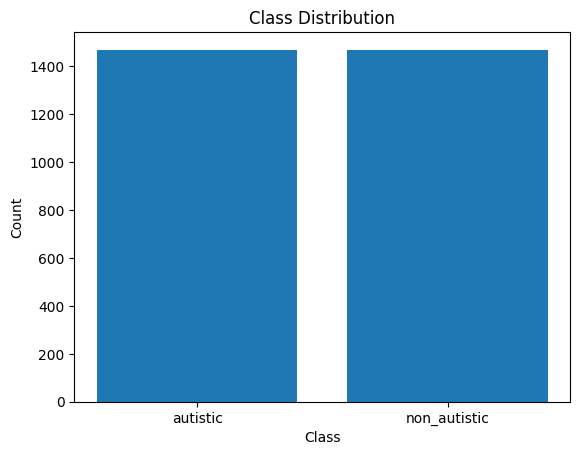

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
dataset = pd.read_csv('/Users/annabachmann/code/bakiery/autism/raw_data/autism.csv')

# Replace 'labels' with the correct column name representing the class labels
labels = dataset['labels']

# Calculate the frequency of each class
class_counts = labels.value_counts()

# Count the number of entries in the dataset
num_entries = len(dataset)

# Display the number of entries and class distribution
print(f"Number of entries: {num_entries}")
print("Class Distribution:")
print(class_counts)

# Visualize the class distribution
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

**Ensure the resized images meet the requirements for model training**

In [2]:
import cv2
import os
from PIL import Image

# Set the directory path where the original images are stored
directory = '/Users/annabachmann/code/bakiery/autism/raw_data/consolidated/autistic'

# Set the desired dimensions for resizing
desired_width = 120
desired_height = 150

# Set the directory path for storing the resized images
output_directory = '/Users/annabachmann/code/bakiery/autism/raw_data/consolidated/autistic_resized'

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Counters for images that meet the requirements
resolution_satisfactory_count = 0
clarity_satisfactory_count = 0
visual_details_satisfactory_count = 0

# Step 1a: Review the resizing process and resize images
for filename in os.listdir(directory):
    if filename.endswith('.jpg') or filename.endswith('.png'):

        # Step 1b: Read the image file
        image_path = os.path.join(directory, filename)
        img = cv2.imread(image_path)

        # Step 1c: Check the image dimensions to confirm uniform resizing
        img_height, img_width, _ = img.shape

        # Resize the image
        resized_img = cv2.resize(img, (desired_width, desired_height))

        # Save the resized image in the output directory
        resized_image_path = os.path.join(output_directory, f"resized_{filename}")
        cv2.imwrite(resized_image_path, resized_img)

# Update the directory variable to the output directory
directory = output_directory
# Step 2a: Check aspect ratio
for filename in os.listdir(directory):
    if filename.startswith('resized_') and (filename.endswith('.jpg') or filename.endswith('.png')):

        # Step 2b: Read the resized image file
        image_path = os.path.join(directory, filename)
        img = cv2.imread(image_path)

        # Step 2c: Calculate aspect ratio of the image
        aspect_ratio = img.shape[1] / img.shape[0]

        # Check the aspect ratio
        if aspect_ratio == (desired_width / desired_height):
            print(f"Image {filename} has the desired aspect ratio.")
        else:
            print(f"Image {filename} has a different aspect ratio.")

# Step 3a: Validate image quality
resolution_satisfactory_count = 0
clarity_satisfactory_count = 0
visual_details_satisfactory_count = 0

for filename in os.listdir(directory):
    if filename.startswith('resized_') and (filename.endswith('.jpg') or filename.endswith('.png')):
        # Step 3b: Read the image file
        image_path = os.path.join(directory, filename)
        img = cv2.imread(image_path)

        # Step 3c: Check image quality based on resolution, clarity, and visual details
        image = Image.open(image_path)

        # Step 3d: Check resolution
        width, height = image.size
        min_width = 120
        min_height = 150
        if width >= min_width and height >= min_height:
            print(f"Image {filename} has satisfactory resolution")
            resolution_satisfactory_count += 1
        else:
            print(f"Image {filename} does not meet the resolution requirements")

        # Step 3e: Check clarity using Laplacian variance
        img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        clarity = cv2.Laplacian(img_gray, cv2.CV_64F).var()
        min_clarity = 50  # Adjust the threshold as per your requirements
        if clarity >= min_clarity:
            print(f"Image {filename} has satisfactory clarity.")
            clarity_satisfactory_count += 1
        else:
            print(f"Image {filename} does not meet the clarity requirements.")
            
            # Upscale the image using image interpolation
            upscaled_img = cv2.resize(img, (2 * img.shape[1], 2 * img.shape[0]), interpolation=cv2.INTER_CUBIC)
            
            # Save the upscaled image
            upscaled_image_path = os.path.join(directory, f"upscaled_{filename}")
            cv2.imwrite(upscaled_image_path, upscaled_img)

        # Step 3f: Check visual details using edge detection
        edges = cv2.Canny(img_gray, 100, 200)
        edge_density = cv2.countNonZero(edges) / (img_gray.shape[0] * img_gray.shape[1])
        min_edge_density = 0.01  # Adjust the threshold as per your requirements
        if edge_density >= min_edge_density:
            print(f"Image {filename} has sufficient visual details.")
            visual_details_satisfactory_count += 1
        else:
            print(f"Image {filename} does not have enough visual details.")
            
            # Upscale the image using image interpolation
            upscaled_img = cv2.resize(img, (2 * img.shape[1], 2 * img.shape[0]), interpolation=cv2.INTER_CUBIC)
            
            # Save the upscaled image
            upscaled_image_path = os.path.join(directory, f"upscaled_{filename}")
            cv2.imwrite(upscaled_image_path, upscaled_img)

# Print the counts
resolution_unsatisfactory_count = len(os.listdir(directory)) - resolution_satisfactory_count
clarity_unsatisfactory_count = len(os.listdir(directory)) - clarity_satisfactory_count
visual_details_unsatisfactory_count = len(os.listdir(directory)) - visual_details_satisfactory_count

print("### Image Quality Validation Results")
print()
print(f"- Resolution: {resolution_satisfactory_count} images meet the resolution requirements, {resolution_unsatisfactory_count} images do not.")
print(f"- Clarity: {clarity_satisfactory_count} images meet the clarity requirements, {clarity_unsatisfactory_count} images do not.")
print(f"- Visual Details: {visual_details_satisfactory_count} images have sufficient visual details, {visual_details_unsatisfactory_count} images do not.")


Image resized_479.jpg has the desired aspect ratio.
Image resized_1289.jpg has the desired aspect ratio.
Image resized_451.jpg has the desired aspect ratio.
Image resized_337.jpg has the desired aspect ratio.
Image resized_323.jpg has the desired aspect ratio.
Image resized_445.jpg has the desired aspect ratio.
Image resized_1262.jpg has the desired aspect ratio.
Image resized_492.jpg has the desired aspect ratio.
Image resized_1276.jpg has the desired aspect ratio.
Image resized_486.jpg has the desired aspect ratio.
Image resized_109.jpg has the desired aspect ratio.
Image resized_60.jpg has the desired aspect ratio.
Image resized_74.jpg has the desired aspect ratio.
Image resized_135.jpg has the desired aspect ratio.
Image resized_653.jpg has the desired aspect ratio.
Image resized_48.jpg has the desired aspect ratio.
Image resized_647.jpg has the desired aspect ratio.
Image resized_121.jpg has the desired aspect ratio.
Image resized_874.jpg has the desired aspect ratio.
Image resize

**Do the same for non-autists**

In [3]:
import cv2
import os
from PIL import Image

# Set the directory path where the original images are stored
directory = '/Users/annabachmann/code/bakiery/autism/raw_data/consolidated/non_autistic'

# Set the desired dimensions for resizing
desired_width = 120
desired_height = 150

# Set the directory path for storing the resized images
output_directory = '/Users/annabachmann/code/bakiery/autism/raw_data/consolidated/non_autistic_resized'

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Counters for images that meet the requirements
resolution_satisfactory_count = 0
clarity_satisfactory_count = 0
visual_details_satisfactory_count = 0

# Step 1a: Review the resizing process and resize images
for filename in os.listdir(directory):
    if filename.endswith('.jpg') or filename.endswith('.png'):

        # Step 1b: Read the image file
        image_path = os.path.join(directory, filename)
        img = cv2.imread(image_path)

        # Step 1c: Check the image dimensions to confirm uniform resizing
        img_height, img_width, _ = img.shape

        # Resize the image
        resized_img = cv2.resize(img, (desired_width, desired_height))

        # Save the resized image in the output directory
        resized_image_path = os.path.join(output_directory, f"resized_{filename}")
        cv2.imwrite(resized_image_path, resized_img)

# Update the directory variable to the output directory
directory = output_directory
# Step 2a: Check aspect ratio
for filename in os.listdir(directory):
    if filename.startswith('resized_') and (filename.endswith('.jpg') or filename.endswith('.png')):

        # Step 2b: Read the resized image file
        image_path = os.path.join(directory, filename)
        img = cv2.imread(image_path)

        # Step 2c: Calculate aspect ratio of the image
        aspect_ratio = img.shape[1] / img.shape[0]

        # Check the aspect ratio
        if aspect_ratio == (desired_width / desired_height):
            print(f"Image {filename} has the desired aspect ratio.")
        else:
            print(f"Image {filename} has a different aspect ratio.")

# Step 3a: Validate image quality
resolution_satisfactory_count = 0
clarity_satisfactory_count = 0
visual_details_satisfactory_count = 0

for filename in os.listdir(directory):
    if filename.startswith('resized_') and (filename.endswith('.jpg') or filename.endswith('.png')):
        # Step 3b: Read the image file
        image_path = os.path.join(directory, filename)
        img = cv2.imread(image_path)

        # Step 3c: Check image quality based on resolution, clarity, and visual details
        image = Image.open(image_path)

        # Step 3d: Check resolution
        width, height = image.size
        min_width = 120
        min_height = 150
        if width >= min_width and height >= min_height:
            print(f"Image {filename} has satisfactory resolution")
            resolution_satisfactory_count += 1
        else:
            print(f"Image {filename} does not meet the resolution requirements")

        # Step 3e: Check clarity using Laplacian variance
        img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        clarity = cv2.Laplacian(img_gray, cv2.CV_64F).var()
        min_clarity = 50  # Adjust the threshold as per your requirements
        if clarity >= min_clarity:
            print(f"Image {filename} has satisfactory clarity.")
            clarity_satisfactory_count += 1
        else:
            print(f"Image {filename} does not meet the clarity requirements.")
            
            # Upscale the image using image interpolation
            upscaled_img = cv2.resize(img, (2 * img.shape[1], 2 * img.shape[0]), interpolation=cv2.INTER_CUBIC)
            
            # Save the upscaled image
            upscaled_image_path = os.path.join(directory, f"upscaled_{filename}")
            cv2.imwrite(upscaled_image_path, upscaled_img)

        # Step 3f: Check visual details using edge detection
        edges = cv2.Canny(img_gray, 100, 200)
        edge_density = cv2.countNonZero(edges) / (img_gray.shape[0] * img_gray.shape[1])
        min_edge_density = 0.01  # Adjust the threshold as per your requirements
        if edge_density >= min_edge_density:
            print(f"Image {filename} has sufficient visual details.")
            visual_details_satisfactory_count += 1
        else:
            print(f"Image {filename} does not have enough visual details.")
            
            # Upscale the image using image interpolation
            upscaled_img = cv2.resize(img, (2 * img.shape[1], 2 * img.shape[0]), interpolation=cv2.INTER_CUBIC)
            
            # Save the upscaled image
            upscaled_image_path = os.path.join(directory, f"upscaled_{filename}")
            cv2.imwrite(upscaled_image_path, upscaled_img)

# Print the counts
resolution_unsatisfactory_count = len(os.listdir(directory)) - resolution_satisfactory_count
clarity_unsatisfactory_count = len(os.listdir(directory)) - clarity_satisfactory_count
visual_details_unsatisfactory_count = len(os.listdir(directory)) - visual_details_satisfactory_count

print("### Image Quality Validation Results")
print()
print(f"- Resolution: {resolution_satisfactory_count} images meet the resolution requirements, {resolution_unsatisfactory_count} images do not.")
print(f"- Clarity: {clarity_satisfactory_count} images meet the clarity requirements, {clarity_unsatisfactory_count} images do not.")
print(f"- Visual Details: {visual_details_satisfactory_count} images have sufficient visual details, {visual_details_unsatisfactory_count} images do not.")

Image resized_479.jpg has the desired aspect ratio.
Image resized_1289.jpg has the desired aspect ratio.
Image resized_451.jpg has the desired aspect ratio.
Image resized_337.jpg has the desired aspect ratio.
Image resized_323.jpg has the desired aspect ratio.
Image resized_445.jpg has the desired aspect ratio.
Image resized_1262.jpg has the desired aspect ratio.
Image resized_492.jpg has the desired aspect ratio.
Image resized_1276.jpg has the desired aspect ratio.
Image resized_486.jpg has the desired aspect ratio.
Image resized_109.jpg has the desired aspect ratio.
Image resized_60.jpg has the desired aspect ratio.
Image resized_74.jpg has the desired aspect ratio.
Image resized_135.jpg has the desired aspect ratio.
Image resized_653.jpg has the desired aspect ratio.
Image resized_48.jpg has the desired aspect ratio.
Image resized_647.jpg has the desired aspect ratio.
Image resized_121.jpg has the desired aspect ratio.
Image resized_874.jpg has the desired aspect ratio.
Image resize

In [47]:
import numpy as np
import cv2
import os
import glob

# Function to preprocess an image
def preprocess_image(filepath, target_size=(120, 150), normalize=True, min_val=0, max_val=255):
    # Load the image
    image = cv2.imread(filepath)
    
    # Check if the image is loaded successfully
    if image is not None:
        # Resize the image to the target size
        image = cv2.resize(image, target_size)
        
        # Normalize the pixel values
        if normalize:
            # Min-max scaling
            image = (image - min_val) / (max_val - min_val)
        
        # Perform any additional preprocessing steps if needed
        
        return image
    else:
        print("Failed to load image:", filepath)
        return None

# Define the directory path where the images are located
directory = '/Users/annabachmann/code/bakiery/autism/raw_data/consolidated/autistic_resized'

# Function to load and preprocess the images
def load_and_preprocess_images(directory, target_size=(120, 150), normalize=True, min_val=0, max_val=255):
    processed_images = []
    
    # Get the list of image filepaths
    image_filepaths = glob.glob(os.path.join(directory, '*.jpg')) + glob.glob(os.path.join(directory, '*.png'))
    
    # Iterate over the image filepaths
    for filepath in image_filepaths:
        # Preprocess the image
        image = preprocess_image(filepath, target_size, normalize, min_val, max_val)
        
        if image is not None:
            processed_images.append(image)
    
    return processed_images

# Specify the target size for resizing the images
target_size = (120, 150)

# Load and preprocess the images with min-max scaling
processed_images = load_and_preprocess_images(directory, target_size, normalize=True, min_val=0, max_val=255)

# Check if the processed_images list is not empty
if processed_images:
    # Convert the list of images to a NumPy array
    processed_images = np.array(processed_images)

    # Calculate the mean and standard deviation of the images
    mean = np.mean(processed_images)
    std = np.std(processed_images)
    
    # Print the images being used
    print("Images used:", len(processed_images))
    
    # Print the mean and standard deviation
    print("Mean:", mean)
    print("Standard Deviation:", std)
else:
    print("No images to process.")


Images used: 1463
Mean: 0.516315994432505
Standard Deviation: 0.26214758591495646


In [48]:
import numpy as np
import cv2
import os
import glob
import random

# Function to preprocess an image with data augmentation
def preprocess_image(filepath, target_size=(120, 150), normalize=True, min_val=0, max_val=255, augment=True):
    # Load the image
    image = cv2.imread(filepath)
    
    # Check if the image is loaded successfully
    if image is not None:
        # Resize the image to the target size
        image = cv2.resize(image, target_size)
        
        # Perform data augmentation if enabled
        if augment:
            # Random rotation
            angle = random.uniform(-10, 10)
            image = rotate_image(image, angle)
            
            # Random horizontal flip
            if random.random() < 0.5:
                image = flip_image(image, axis=1)
            
            # Random vertical flip
            if random.random() < 0.5:
                image = flip_image(image, axis=0)
            
            # Random zoom
            scale = random.uniform(0.8, 1.2)
            image = zoom_image(image, scale)
        
        # Normalize the pixel values
        if normalize:
            # Min-max scaling
            image = (image - min_val) / (max_val - min_val)
        
        return image
    else:
        print("Failed to load image:", filepath)
        return None

# Function to perform rotation on an image
def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

# Function to perform flip on an image
def flip_image(image, axis):
    flipped_image = cv2.flip(image, axis)
    return flipped_image

# Function to perform zoom on an image
def zoom_image(image, scale):
    rows, cols = image.shape[:2]
    zoom_matrix = cv2.getAffineTransform(np.float32([[0, 0], [cols, 0], [0, rows]]),
                                         np.float32([[cols * (1 - scale) / 2, rows * (1 - scale) / 2],
                                                     [cols * (1 + scale) / 2, rows * (1 - scale) / 2],
                                                     [cols * (1 - scale) / 2, rows * (1 + scale) / 2]]))
    zoomed_image = cv2.warpAffine(image, zoom_matrix, (cols, rows))
    return zoomed_image

# Define the directory path where the images are located
directory = '/Users/annabachmann/code/bakiery/autism/raw_data/consolidated/non_autistic_resized'

# Function to load and preprocess the images with data augmentation
def load_and_preprocess_images(directory, target_size=(120, 150), normalize=True, min_val=0, max_val=255, augment=True):
    processed_images = []
    
    # Get the list of image filepaths
    image_filepaths = glob.glob(os.path.join(directory, '*.jpg')) + glob.glob(os.path.join(directory, '*.png'))
    
    # Iterate over the image filepaths
    for filepath in image_filepaths:
        # Preprocess the image with data augmentation
        image = preprocess_image(filepath, target_size, normalize, min_val, max_val, augment)
        
        if image is not None:
            processed_images.append(image)

    return processed_images

# Specify the target size for resizing the images
target_size = (120, 150)

# Load and preprocess the images with data augmentation
processed_images = load_and_preprocess_images(directory, target_size, normalize=True, min_val=0, max_val=255, augment=True)

# Check if the processed_images list is not empty
if processed_images:
    # Convert the list of images to a NumPy array
    processed_images = np.array(processed_images)

    # Calculate the mean and standard deviation of the images
    mean = np.mean(processed_images)
    std = np.std(processed_images)
    
    # Print the images being used
    print("Images used:", len(processed_images))
    
    # Print the mean and standard deviation
    print("Mean:", mean)
    print("Standard Deviation:", std)
else:
    print("No images to process.")


Images used: 1466
Mean: 0.4998788296522201
Standard Deviation: 0.29121939125422736


In [51]:
# Perform necessary data cleaning and verification
import pandas as pd

# Load the dataset into a pandas DataFrame
dataset = pd.read_csv('/Users/annabachmann/code/bakiery/autism/raw_data/autism.csv')
dataset

,filepaths,labels,dataset
0,test/autistic/001.jpg,autistic,test
1,test/autistic/002.jpg,autistic,test
2,test/autistic/003.jpg,autistic,test
3,test/autistic/004.jpg,autistic,test
4,test/autistic/005.jpg,autistic,test
...,...,...,...
2933,valid/non_autistic/096.jpg,non_autistic,valid
2934,valid/non_autistic/097.jpg,non_autistic,valid
2935,valid/non_autistic/098.jpg,non_autistic,valid
2936,valid/non_autistic/099.jpg,non_autistic,valid
